In [2]:
# Importing requires libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import keras

In [4]:
import os

train_dir = "Datasets/train"  # Update this if the path is different
if not os.path.exists(train_dir):
    print(f"Directory '{train_dir}' not found!")
else:
    print(f"Directory '{train_dir}' exists!")


Directory 'Datasets/train' exists!


In [5]:
# Image Preprocessing using keras library
training_set = tf.keras.utils.image_dataset_from_directory(
    'Datasets/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [6]:
# Validation Image Preprocessing using keras library
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Datasets/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[147.   119.   105.  ]
   [157.5  129.5  115.5 ]
   [125.25  97.25  83.25]
   ...
   [157.5  135.5  124.5 ]
   [155.5  133.5  122.5 ]
   [144.25 122.25 111.25]]

  [[163.5  135.5  121.5 ]
   [144.75 116.75 102.75]
   [132.5  104.5   90.5 ]
   ...
   [158.5  136.5  125.5 ]
   [150.   128.   117.  ]
   [152.5  130.5  119.5 ]]

  [[149.25 121.25 107.25]
   [152.   124.   110.  ]
   [157.25 129.25 115.25]
   ...
   [159.   137.   126.  ]
   [173.25 151.25 140.25]
   [161.   139.   128.  ]]

  ...

  [[134.   107.    98.  ]
   [114.25  87.25  78.25]
   [124.25  97.25  88.25]
   ...
   [187.5  167.5  156.5 ]
   [163.75 143.75 132.75]
   [163.25 143.25 132.25]]

  [[127.25 100.25  91.25]
   [124.    97.    88.  ]
   [127.75 100.75  91.75]
   ...
   [181.5  161.5  150.5 ]
   [163.5  143.5  132.5 ]
   [180.5  160.5  149.5 ]]

  [[111.75  84.75  75.75]
   [127.75 100.75  91.75]
   [111.25  84.25  75.25]
   ...
   [175.75 155.75 144.75]
   [178.75 158.75 147.75]
   [162.5  142.5  13

In [9]:
# Building Model

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

In [11]:
# Building Convolution Layer

In [12]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

c:\Users\Rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(units=1500,activation='relu'))

In [20]:
model.add(Dropout(0.4))

In [21]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [22]:
from tensorflow.keras.optimizers import Adam  # Use this instead of legacy.Adam

optimizer = Adam(learning_rate=0.001)


In [23]:
# Compiling Model

In [24]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [25]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

ImportError: `keras.optimizers.legacy` is not supported in Keras 3. When using `tf.keras`, to continue using a `tf.keras.optimizers.legacy` optimizer, you can install the `tf_keras` package (Keras 2) and set the environment variable `TF_USE_LEGACY_KERAS=True` to configure TensorFlow to use `tf_keras` when accessing `tf.keras`.

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Model Training

In [28]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10,)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2312s 1s/step - accuracy: 0.0537 - loss: 3.5525 - val_accuracy: 0.2016 - val_loss: 2.8302
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2027s 922ms/step - accuracy: 0.3766 - loss: 2.1072 - val_accuracy: 0.6682 - val_loss: 1.0532
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2095s 954ms/step - accuracy: 0.6568 - loss: 1.0882 - val_accuracy: 0.7656 - val_loss: 0.7363
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7314s 3s/step - accuracy: 0.7421 - loss: 0.8045 - val_accuracy: 0.7849 - val_loss: 0.6613
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1746s 795ms/step - accuracy: 0.7830 - loss: 0.6753 - val_accuracy: 0.8132 - val_loss: 0.5709
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1836s 836ms/step - accuracy: 0.8070 - loss: 0.5936 - val_accuracy: 0.8310 - val_loss: 0.5139
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1600s 728ms/step - accuracy: 0.8225 - loss: 0.5469 - val_accuracy: 0.7938 - val_loss: 0.6679
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2087s 950ms/step - 

In [29]:
# Model Evaluation

In [30]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 530s 241ms/step - accuracy: 0.9090 - loss: 0.2813


In [31]:
print(train_loss,train_acc)

0.26141607761383057 0.9154989719390869


In [32]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 281s 510ms/step - accuracy: 0.8641 - loss: 0.4201


In [33]:
print(val_loss,val_acc)

0.4286727011203766 0.8614272475242615


In [34]:
model.save("trained_model.keras")

In [35]:
training_history.history

{'accuracy': [0.06839746981859207,
  0.4878014028072357,
  0.6809303760528564,
  0.7520164847373962,
  0.7905398607254028,
  0.8092325329780579,
  0.8250942230224609,
  0.8380112648010254,
  0.8431183099746704,
  0.8549683690071106],
 'loss': [3.447829008102417,
  1.6817477941513062,
  1.004380702972412,
  0.7717553377151489,
  0.6511215567588806,
  0.5864816904067993,
  0.5367646217346191,
  0.49315133690834045,
  0.4812051057815552,
  0.44693899154663086],
 'val_accuracy': [0.20157067477703094,
  0.668222188949585,
  0.7656499147415161,
  0.7849419713020325,
  0.8131687045097351,
  0.8310379981994629,
  0.7937628030776978,
  0.8461188077926636,
  0.8538584113121033,
  0.8614272475242615],
 'val_loss': [2.83024525642395,
  1.0531805753707886,
  0.7363207340240479,
  0.6612904667854309,
  0.570897102355957,
  0.5139294266700745,
  0.6678590178489685,
  0.47262462973594666,
  0.44787168502807617,
  0.42867252230644226]}

In [36]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [37]:
training_history.history['val_accuracy']

[0.20157067477703094,
 0.668222188949585,
 0.7656499147415161,
 0.7849419713020325,
 0.8131687045097351,
 0.8310379981994629,
 0.7937628030776978,
 0.8461188077926636,
 0.8538584113121033,
 0.8614272475242615]

In [38]:
# Accuracy Visualization

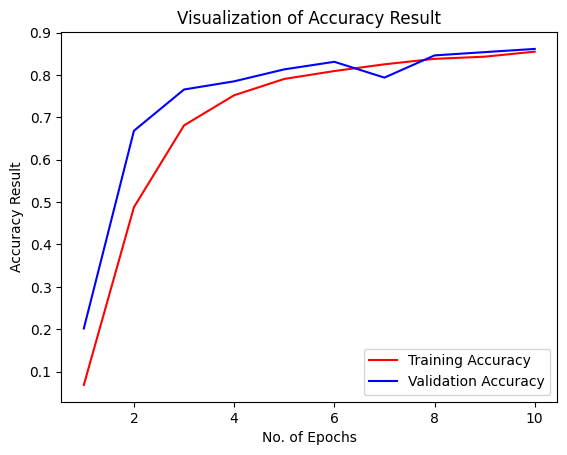

In [39]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [ ]:
# Some other metrics for model evaluation

In [40]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [53]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Datasets/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [54]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 112s 202ms/step


(array([[9.45645034e-01, 4.90104407e-02, 4.08675220e-07, ...,
         4.71495755e-16, 8.78644217e-14, 1.23273245e-12],
        [8.76235485e-01, 1.01971753e-01, 1.16694798e-06, ...,
         1.20025582e-12, 1.03814353e-10, 5.38413307e-11],
        [9.96837854e-01, 1.57545237e-05, 4.14375512e-09, ...,
         4.07315891e-21, 9.67079793e-15, 8.23102220e-13],
        ...,
        [5.78737418e-05, 3.83690258e-12, 1.63984217e-03, ...,
         5.69979055e-03, 2.89790396e-08, 8.64571810e-01],
        [3.24154427e-16, 7.84388357e-27, 1.09906686e-15, ...,
         1.71016509e-05, 4.23003222e-22, 9.99982834e-01],
        [9.00512731e-09, 1.35097578e-09, 7.69114217e-10, ...,
         1.20231045e-04, 2.00075985e-04, 6.59573674e-01]], dtype=float32),
 (17572, 38))

In [55]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [56]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [57]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [58]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [62]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.1 MB 10.7 MB/s eta 0:00:01
   ---------------- ----------------------- 4.7/11.1 MB 11.4 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 11.6 MB/s eta 0:00:01
   --------------------------------- ------ 9.4/11.1 MB 11.5 MB/s eta 0:00:01
   ----------------------------------- ---- 10.0/11.1 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 9.5 MB/s eta 0:00:00


In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.83      0.82      0.82       504
                                 Apple___Black_rot       0.89      0.95      0.92       497
                          Apple___Cedar_apple_rust       0.96      0.87      0.91       440
                                   Apple___healthy       0.77      0.80      0.78       502
                               Blueberry___healthy       0.89      0.92      0.90       454
          Cherry_(including_sour)___Powdery_mildew       0.93      0.83      0.88       421
                 Cherry_(including_sour)___healthy       0.93      0.95      0.94       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.86      0.82      0.84       410
                       Corn_(maize)___Common_rust_       0.93      1.00      0.96       477
               Corn_(maize)___Northern_Leaf_Blight       0.86      0.87      0.

In [65]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[412,  20,   0, ...,   0,   1,   0],
       [  5, 473,   0, ...,   0,   0,   0],
       [  3,   2, 383, ...,   1,   0,   1],
       ...,
       [  0,   0,   0, ..., 438,   2,   1],
       [  0,   0,   0, ...,   0, 435,   0],
       [  0,   0,   0, ...,   2,   3, 378]])

In [66]:
### Confusion Matrix Visualization

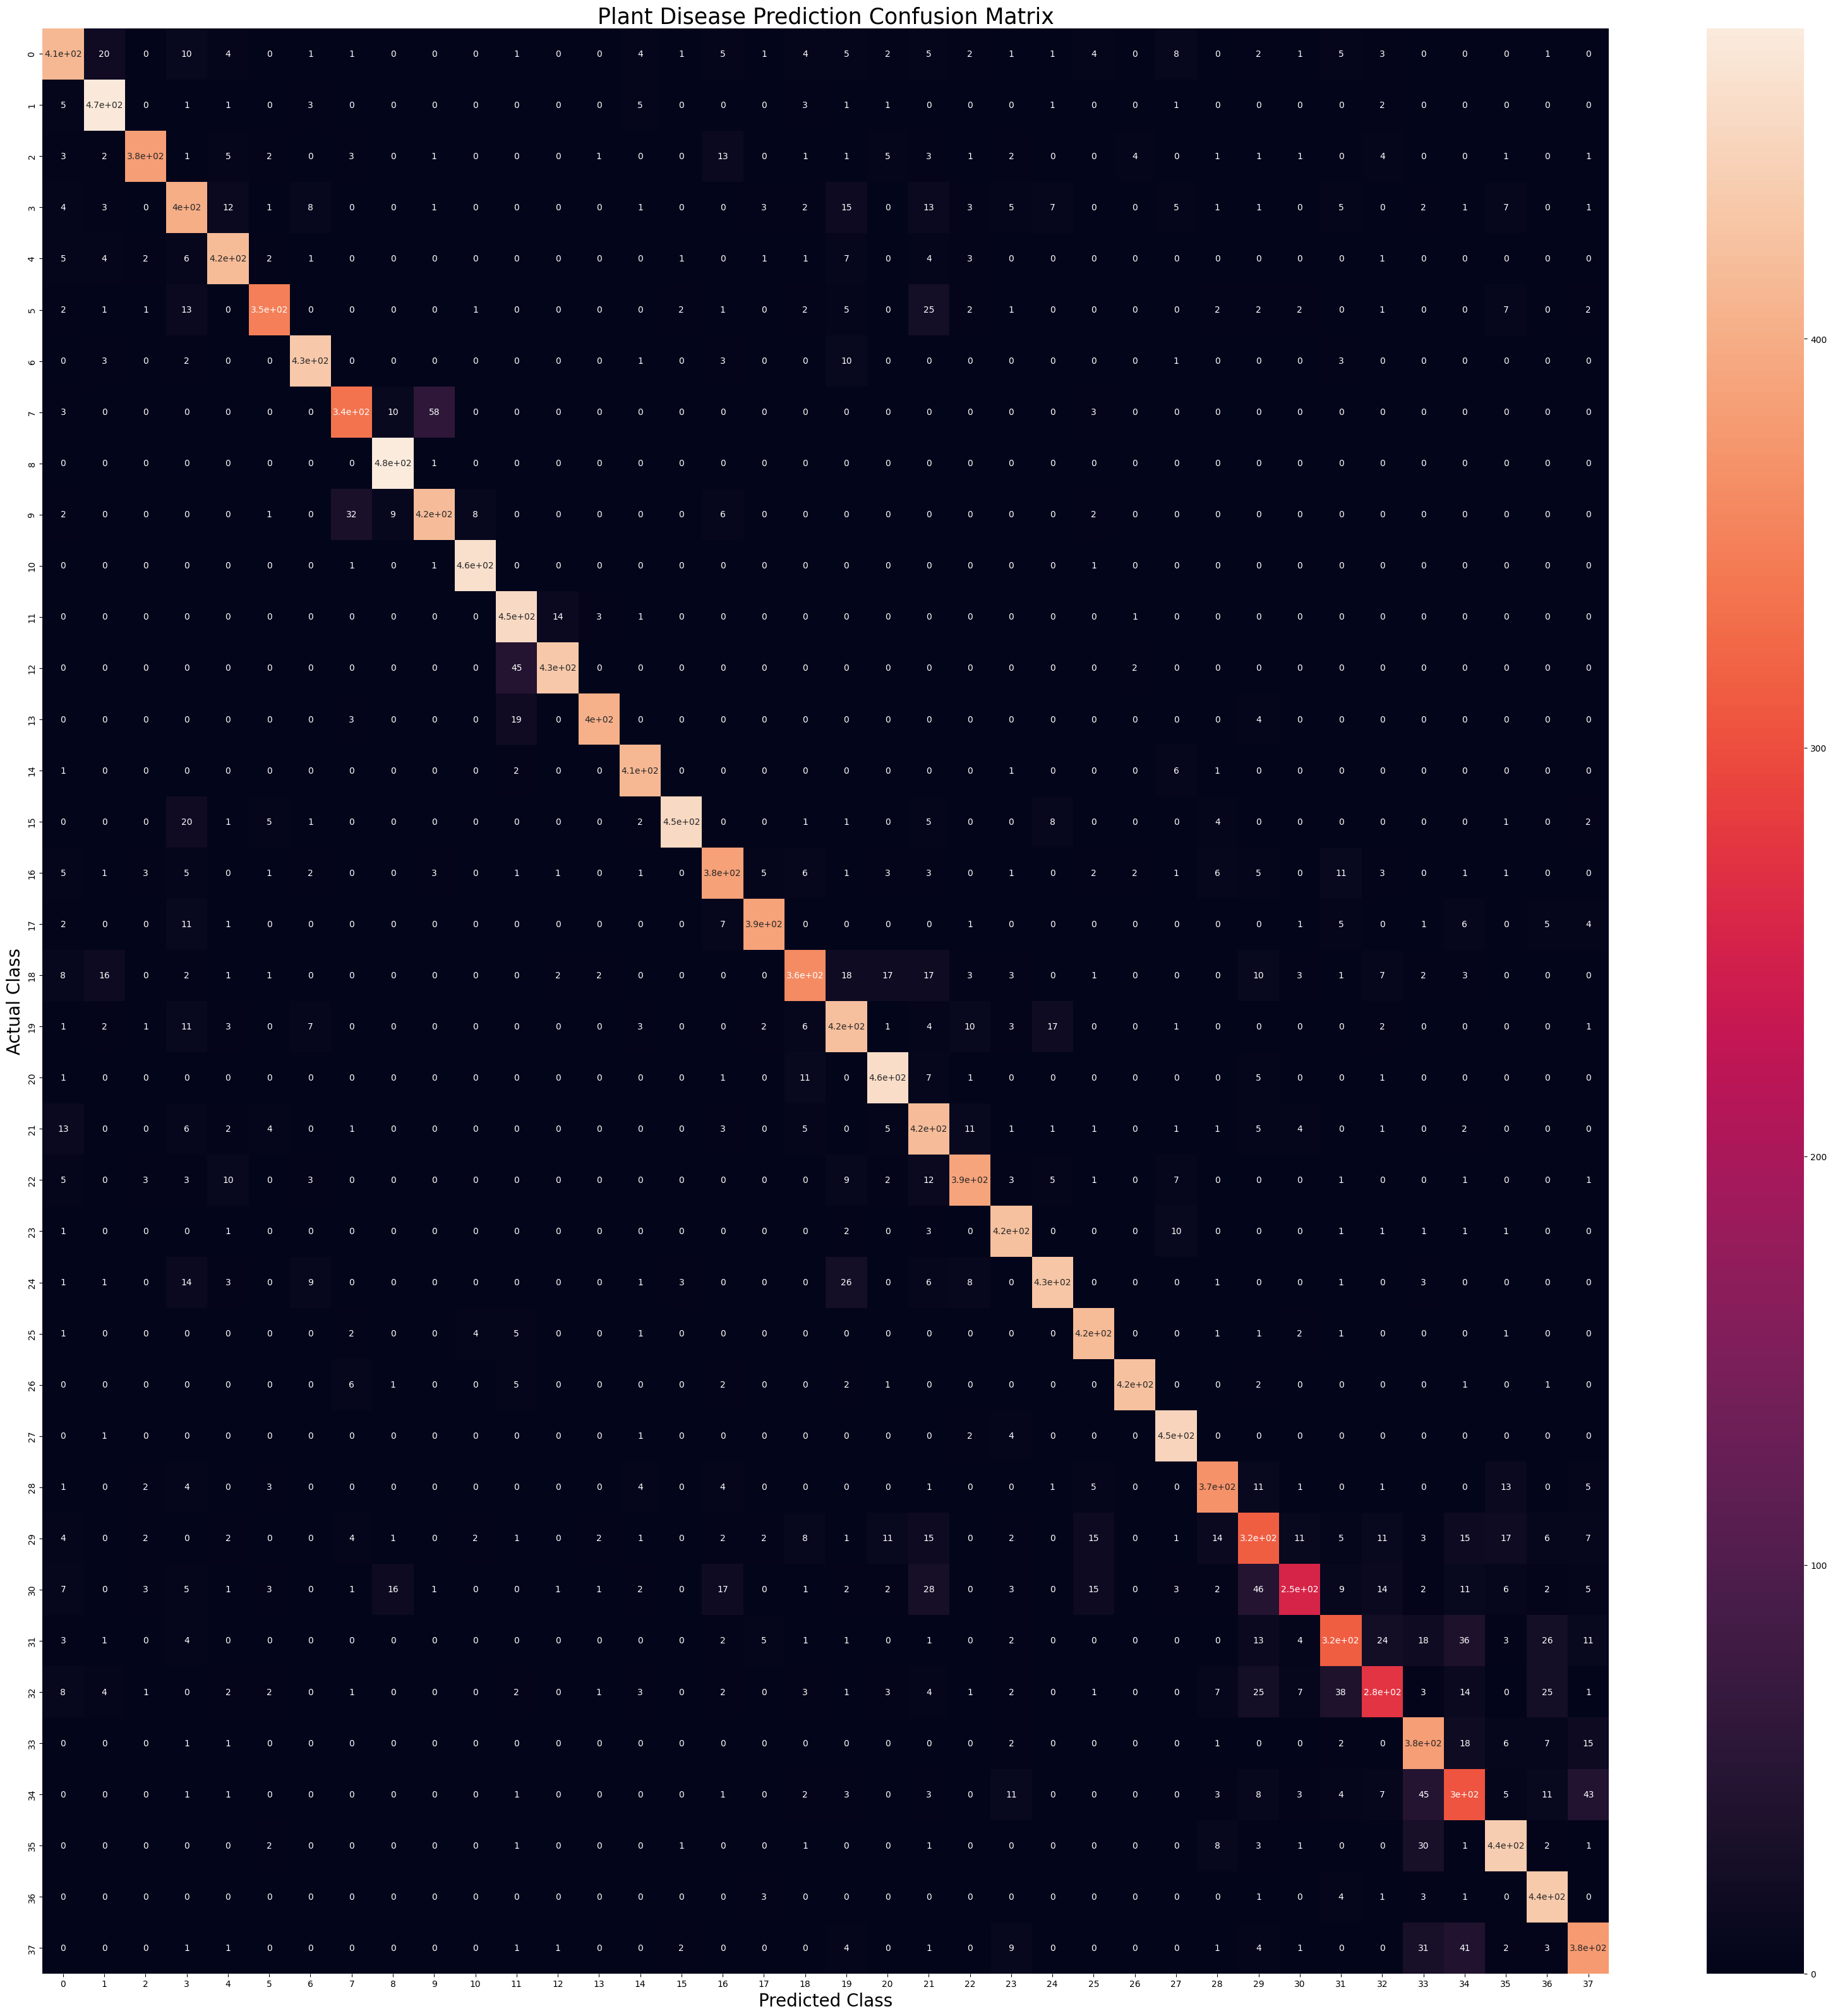

In [67]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()